In [1]:
import matplotlib.pyplot as plt
import numpy as np

from lisatools.sensitivity import *
from lisatools.utils.constants import *

### LISA Sensitivity (averaged)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Characteristic Strain')

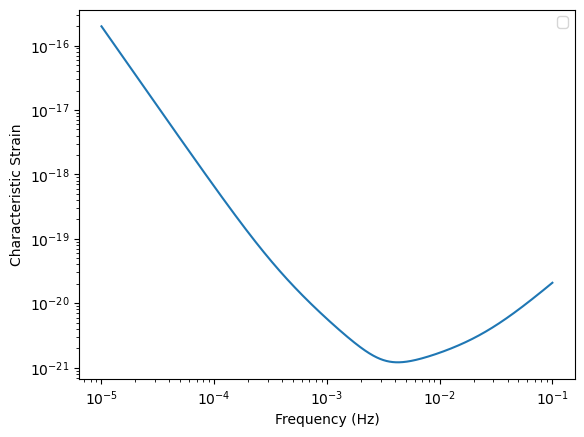

In [2]:
f = np.logspace(-5, -1, 10000)
Sn = get_sensitivity(f, sens_fn=LISASens, return_type="char_strain")
plt.loglog(f, Sn)
plt.legend()
plt.xlabel("Frequency (Hz)")
plt.ylabel("Characteristic Strain")

### LISA Noise PSD for TDI channels X,Y,Z

Text(0, 0.5, 'PSD')

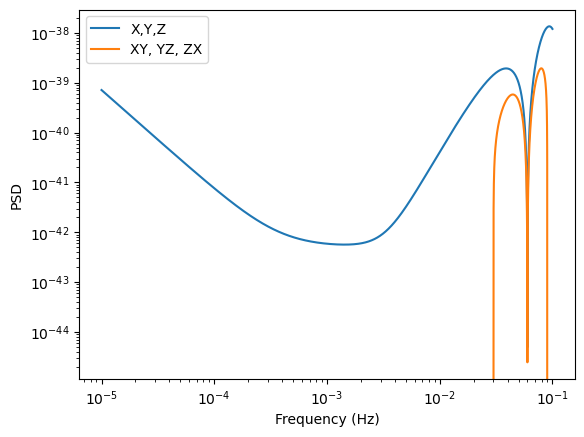

In [3]:
f = np.logspace(-5, -1, 10000)
Sn = get_sensitivity(f, sens_fn=X1TDISens, return_type="PSD")
plt.loglog(f, Sn, label="X,Y,Z")
Cn = get_sensitivity(f, sens_fn=XY1TDISens, return_type="PSD")
plt.loglog(f, Cn, label="XY, YZ, ZX")
plt.legend()
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD")

### LISA Noise PSD for TDI channels A,E

Text(0, 0.5, 'PSD')

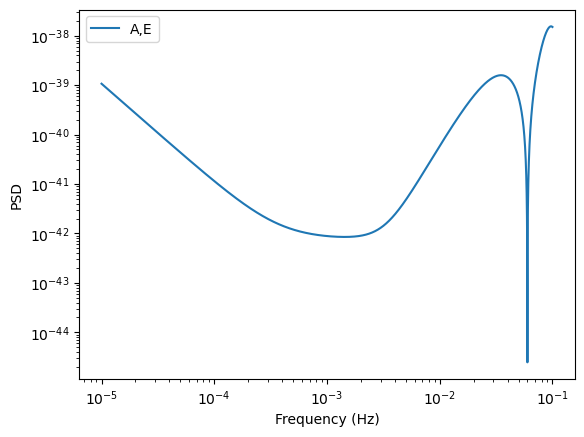

In [4]:
f = np.logspace(-5, -1, 10000)
Sn = get_sensitivity(f, sens_fn=A1TDISens, return_type="PSD")
plt.loglog(f, Sn, label="A,E")
plt.xlabel("Frequency (Hz)")
plt.legend()
plt.ylabel("PSD")

### Sensitivity Matrices

In [21]:
sens_mat = SensitivityMatrix(
    f,
    [
        [X1TDISens, XY1TDISens, ZX1TDISens],
        [XY1TDISens, Y1TDISens, YZ1TDISens],
        [ZX1TDISens, YZ1TDISens, Z1TDISens],
    ],
    stochastic_params=(1.0 * YRSID_SI,),
    model=lisa_models.scirdv1,
)

sens_mat2 = AE1SensitivityMatrix(
    f,
    # stochastic_params=None, (1.0 * YRSID_SI,),
    model=lisa_models.scirdv1,
    stochastic_function=None
)

sens_mat3 = AE1SensitivityMatrix(
    f,
    stochastic_params=(4.0 * YRSID_SI,),
    model=lisa_models.scirdv1,
)

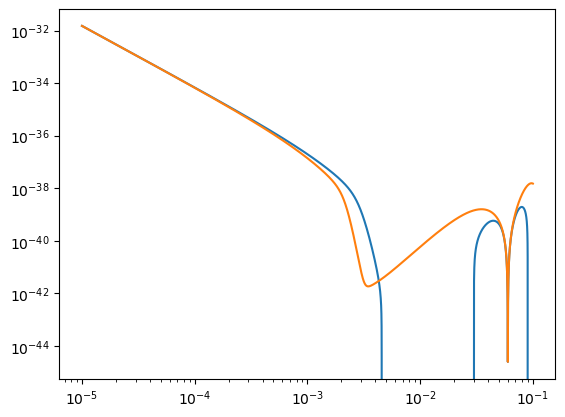

In [22]:
plt.loglog(f, sens_mat[0, 1])
plt.loglog(f, sens_mat3[0])